In [216]:
!git clone https://github.com/aebyy/Traffic-Sign-Recognition.git

fatal: destination path 'Traffic-Sign-Recognition' already exists and is not an empty directory.


In [217]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [218]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

print(cur_path)
cur_path = "/content/Traffic-Sign-Recognition/Traffic sign classification"

/content


In [219]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = sorted(os.listdir(path))

    for a in images:
        try:
            temp = path + '/' + a
            image = Image.open(temp)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
    


In [220]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [221]:

#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
len(y_train)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


31367

In [222]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [223]:

#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [224]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/10
981/981 [==============================] - 6s 6ms/step - loss: 2.1501 - accuracy: 0.4618 - val_loss: 0.6465 - val_accuracy: 0.8472
Epoch 2/10
981/981 [==============================] - 5s 5ms/step - loss: 0.7566 - accuracy: 0.7729 - val_loss: 0.3134 - val_accuracy: 0.9162
Epoch 3/10
981/981 [==============================] - 5s 5ms/step - loss: 0.5184 - accuracy: 0.8462 - val_loss: 0.1825 - val_accuracy: 0.9538
Epoch 4/10
981/981 [==============================] - 5s 5ms/step - loss: 0.3900 - accuracy: 0.8856 - val_loss: 0.1334 - val_accuracy: 0.9638
Epoch 5/10
981/981 [==============================] - 5s 5ms/step - loss: 0.3568 - accuracy: 0.8960 - val_loss: 0.1080 - val_accuracy: 0.9727
Epoch 6/10
981/981 [==============================] - 5s 5ms/step - loss: 0.2845 - accuracy: 0.9162 - val_loss: 0.0898 - val_accuracy: 0.9744
Epoch 7/10
981/981 [==============================] - 5s 5ms/step - loss: 0.2657 - accuracy: 0.9245 - val_loss: 0.1074 - val_accuracy: 0.9753
Epoch 

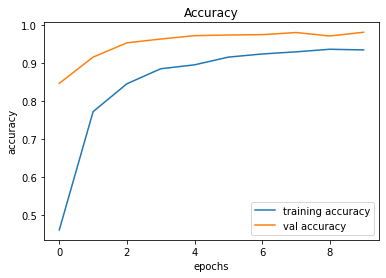

In [225]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

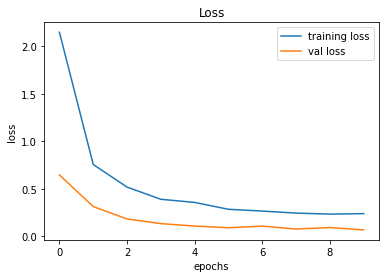

In [226]:

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [227]:

#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('/content/Traffic-Sign-Recognition/Traffic sign classification/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open('/content/Traffic-Sign-Recognition/Traffic sign classification/'+img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)
# predict_x=model.predict(X_test) 
# pred=np.argmax(predict_x,axis=1)
predict_x=(model.predict(X_test) > 0.5).astype("int32") 
pred=np.argmax(predict_x,axis=1)

In [228]:


#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))


0.9368171021377673


In [229]:
#model.save('traffic_classifier.h5')